# Case Study for School
- Can we predict the price of the equipment?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/Train.csv')
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       4

- We have a lot of features in this data set and most of them are incomplete. That means we need to impute data or simply not use it.

- Checked a few features using .value_counts() and decide to make the first model using 6 features.

In [4]:
df.Enclosure.value_counts()

OROPS                  173932
EROPS                  139026
EROPS w AC              87820
EROPS AC                   17
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

In [5]:
df2 = df[['ModelID','YearMade','saledate','Enclosure','ProductGroup','state','SalePrice']]

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 7 columns):
ModelID         401125 non-null int64
YearMade        401125 non-null int64
saledate        401125 non-null object
Enclosure       400800 non-null object
ProductGroup    401125 non-null object
state           401125 non-null object
SalePrice       401125 non-null int64
dtypes: int64(3), object(4)
memory usage: 21.4+ MB


- Fill in the missing values with 'None or Unspecified'

In [7]:
df2.fillna('None or Unspecified',inplace=True)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 7 columns):
ModelID         401125 non-null int64
YearMade        401125 non-null int64
saledate        401125 non-null object
Enclosure       401125 non-null object
ProductGroup    401125 non-null object
state           401125 non-null object
SalePrice       401125 non-null int64
dtypes: int64(3), object(4)
memory usage: 21.4+ MB


- Sale date is a string, we need to convert it into a year so we can get the age of the equipment.

In [9]:
df2.saledate = pd.to_datetime(df2['saledate']).apply(lambda x: int(str(x).split('-')[0]))

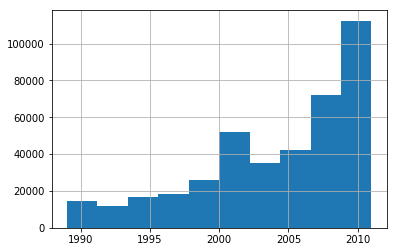

In [10]:
df2.saledate.hist()

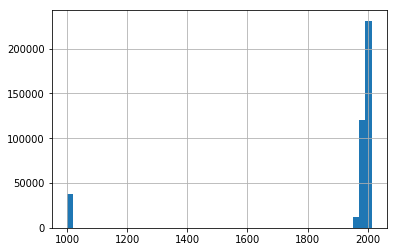

In [11]:
df2.YearMade.hist(bins=50)

- Year Made appears to have a lot of 1000 values, let's impute this data by replacing the values with the median year.

In [12]:
def clean_year(num):
    if num == 1000:
        return df2[df2.YearMade!=1000].YearMade.median()
    else:
        return num

In [14]:
df2.YearMade = df2.YearMade.apply(lambda x: clean_year(x))

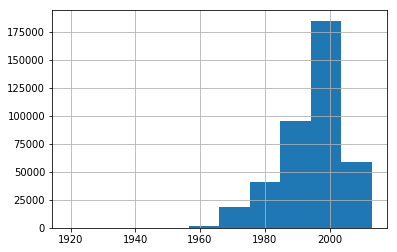

In [15]:
df2.YearMade.hist()

- Now we can get the Age and drop YearMade and saledate

In [16]:
df2['Age']=df2['saledate']-df2['YearMade']

In [17]:
df2.drop(['YearMade','saledate'],axis=1,inplace=True)

- Let's start converting the categoricals using get_dummies.
- Then we add them to our dataframe
- Finally we drop the categorical columns

In [18]:
df2 = pd.concat([df2,pd.get_dummies(df2['Enclosure'])],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['ProductGroup'])],axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['state'])],axis=1)
df2 = df2.drop(['Enclosure'], axis=1)
df2 = df2.drop(['ProductGroup'], axis=1)
df2 = df2.drop(['state'], axis=1)

In [19]:
df2.head()

,ModelID,SalePrice,Age,EROPS,EROPS AC,EROPS w AC,NO ROPS,None or Unspecified,OROPS,BL,...,Texas,Unspecified,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
0,3157,66000,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77,57000,8.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7009,10000,3.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,332,38500,10.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,17311,11000,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


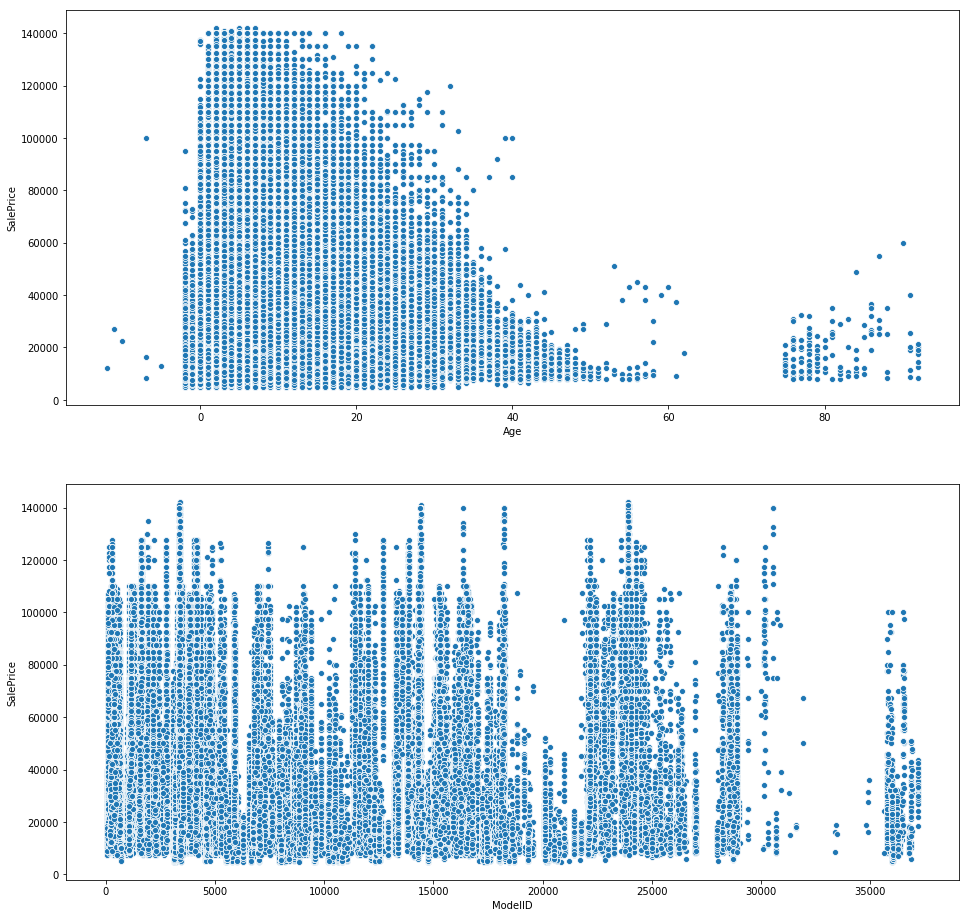

In [26]:
fig,ax = plt.subplots(2,figsize=(16,16))
sns.scatterplot(df2.Age,df2.SalePrice,ax=ax[0])
sns.scatterplot(df2.ModelID,df2.SalePrice,ax=ax[1])

## In order to save time in the future, let's create a function to clean our data:

In [ ]:
def preprocessing(df):
    df = df[['ModelID','YearMade','saledate','Enclosure','ProductGroup','state','SalePrice']]
    df.saledate = pd.to_datetime(df['saledate']).apply(lambda x: int(str(x).split('-')[0]))
    df.fillna('None or Unspecified',inplace=True)
    df.YearMade = df.YearMade.apply(lambda x: clean_year(x))
    df['Age']=df['saledate']-df['YearMade']
    df.drop(['YearMade','saledate'],axis=1,inplace=True)
    df = pd.concat([df,pd.get_dummies(df['Enclosure'])],axis=1)
    df = pd.concat([df,pd.get_dummies(df['ProductGroup'])],axis=1)
    df = pd.concat([df,pd.get_dummies(df['state'])],axis=1)
    df2.drop(['Enclosure'], axis=1,inplace=True)
    df2.drop(['ProductGroup'], axis=1,inplace=True)
    df2.drop(['state'], axis=1,inplace=True)

## Now that our dataset is ready, let's start building our model.
- First we import what we'll need
- Second we split our X and y
- We split our data into training set and test set


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
X = df2.drop(['SalePrice'], axis =1)
y = df2['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
y_train.hist()

- let's take the log of y_train so we can get a more normalized distribution

In [ ]:
y_train_log = np.log(y_train)

In [ ]:
y_train_log.hist()

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train_log)
y_predict = lin_model.predict(X_test)

In [ ]:
lin_model.score(X_test,np.log(y_test))

In [ ]:
X_train = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train_log,np.array(X_train))
result = model.fit()
result.summary()

In [ ]:
sns.scatterplot(y_train,result.resid)

In [ ]:
sns.scatterplot(y_train,y_predict)

In [ ]:
modelyear = df2[df2.YearMade!=1000].groupby(['ModelID'])['YearMade'].mean().astype(int)

In [ ]:
modelyear[28]

In [ ]:
sns.boxplot(df2.ProductGroup,df2.SalePrice)